# Facial keypoints detection

## Introduction

Notre données est constitué par 15 paires de valeurs réelles (x,y) dans l'espace des indices de pixels. Chaque paire représent un élément clé du visage. 

Nos 15 éléments clés du visage: 
* left_eye_center, 
* right_eye_center, 
* left_eye_inner_corner, 
* left_eye_outer_corner, 
* right_eye_inner_corner, 
* right_eye_outer_corner, 
* left_eyebrow_inner_end, 
* left_eyebrow_outer_end, 
* right_eyebrow_inner_end, 
* right_eyebrow_outer_end, 
* nose_tip, 
* mouth_left_corner,
* mouth_right_corner,
* mouth_center_top_lip,
* mouth_center_bottom_lip.



## Objetctif

L'objectif est de prédire __les positions des points clés sur les images de visage__.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Chargement de données

In [2]:
data = pd.read_csv('/Users/sariakarandrianjanahary/Desktop/projet_kaggle_sariaka/projet2/data/IdLookupTable.csv')

In [3]:
train = pd.read_csv ('/Users/sariakarandrianjanahary/Desktop/projet_kaggle_sariaka/projet2/data/training.csv')

In [4]:
# Affichage de la transposer des 5 dérnières lignes de notre données 
train.tail().T

,7044,7045,7046,7047,7048
left_eye_center_x,67.4025,66.1344,66.6907,70.9651,66.9383
left_eye_center_y,31.8426,38.3655,36.8452,39.8537,43.4245
right_eye_center_x,29.7467,30.4786,31.6664,30.5433,31.0961
right_eye_center_y,38.6329,39.9502,39.685,40.7723,39.5286
left_eye_inner_corner_x,NaN,NaN,NaN,NaN,NaN
left_eye_inner_corner_y,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_x,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_y,NaN,NaN,NaN,NaN,NaN
right_eye_inner_corner_x,NaN,NaN,NaN,NaN,NaN
right_eye_inner_corner_y,NaN,NaN,NaN,NaN,NaN


## Déscription des données

In [5]:
# Affiche de la dimension de notre données
print('La dimesion de notre données est', train.shape)

La dimesion de notre données est (7049, 31)


Déscription de la variable : on a **30 variables expliquatives** 

## Nettoyage des données 

###  Valeurs manquates

In [6]:
# Les valeurs maquantes
train.isnull().any().value_counts()

True     28
False     3
dtype: int64

On a 28 variables avec des valeurs maquantes. 

In [7]:
# Affichage le nombre de valeur maquante pour chaque variable de notre données
print('Le nombre de valeur manquante de chaque variable:\n',
      train.isnull().sum())

Le nombre de valeur manquante de chaque variable:
 left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       47

### Remplacement des valeurs maquantes

On constate qu'il y en a beaucoup de valeurs maquantes pour chaque variable, alors pour ne pas perdre des informations, on va las remplacer avec les valeurs de la ligne précédente. 

In [8]:
# Remplacement des valeurs manquantes
train.fillna(method='ffill',inplace=True)

In [9]:
# Affiche de la transposer des 5 dernières lignes de notre données pour bien voir les valeurs remplacer
train.tail().T

,7044,7045,7046,7047,7048
left_eye_center_x,67.4025,66.1344,66.6907,70.9651,66.9383
left_eye_center_y,31.8426,38.3655,36.8452,39.8537,43.4245
right_eye_center_x,29.7467,30.4786,31.6664,30.5433,31.0961
right_eye_center_y,38.6329,39.9502,39.685,40.7723,39.5286
left_eye_inner_corner_x,59.2553,59.2553,59.2553,59.2553,59.2553
left_eye_inner_corner_y,36.0651,36.0651,36.0651,36.0651,36.0651
left_eye_outer_corner_x,73.9427,73.9427,73.9427,73.9427,73.9427
left_eye_outer_corner_y,34.6247,34.6247,34.6247,34.6247,34.6247
right_eye_inner_corner_x,37.4785,37.4785,37.4785,37.4785,37.4785
right_eye_inner_corner_y,39.398,39.398,39.398,39.398,39.398


In [10]:
# Création d'une liste d'image
imag = []
for i in range(0,7049):
    img = train['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [11]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

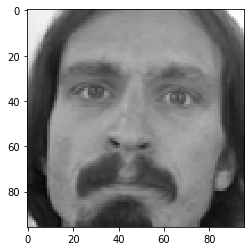

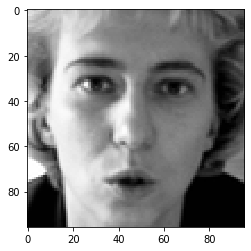

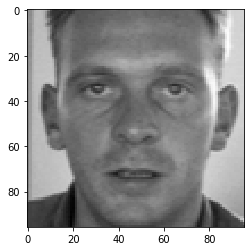

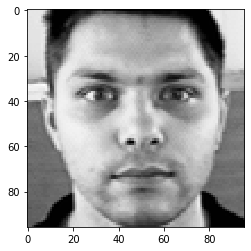

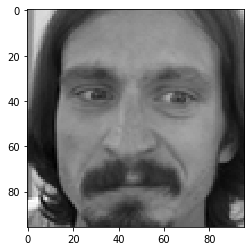

In [13]:
for i in image_list[:5]:
    plt.imshow(i.reshape(96,96),cmap='gray')
    plt.show()